<a href="https://colab.research.google.com/github/figaz123/pytorch-udemy/blob/main/Copy_of_01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import necessary libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

In [2]:
# Setup device-agnostic code
cuda = torch.device("cuda:0")
cuda

device(type='cuda', index=0)

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [3]:
# Create the data parameters
weights = 0.3
bias = 0.9
#mke dummy data
start = 0
end = 1
step = 0.01

# Make X and y using linear regression feature
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weights * X + bias
print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [4]:
print(y[90:])

tensor([[1.1700],
        [1.1730],
        [1.1760],
        [1.1790],
        [1.1820],
        [1.1850],
        [1.1880],
        [1.1910],
        [1.1940],
        [1.1970]])


In [5]:
# Split the data into training and testing
train_data = int(0.8 * len(X))

X_train, y_train = X[:train_data], y[:train_data]
x_test, y_test = X[train_data:], y[train_data:]
len(X_train), len(y_train), len(x_test), len(y_test)

(80, 80, 20, 20)

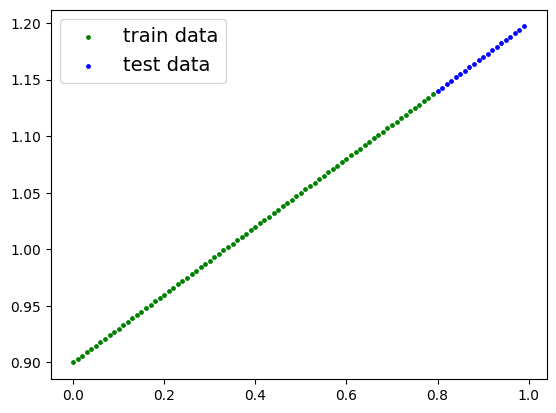

<Figure size 1400x1000 with 0 Axes>

In [6]:
# Plot the training and testing data
def linear_plot(train_data=X_train,
                train_label=y_train,
                test_data=x_test,
                test_label = y_test,
                predictions = None):

  plt.scatter(train_data, train_label, c="g", s=6, label="train data")
  plt.scatter(test_data, test_label, c="b", s=6, label="test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=6, label="prediction")

  plt.legend(prop={"size": 14})
  plt.figure(figsize=(14, 10))
  plt.show()


linear_plot()

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [7]:
# Create PyTorch linear regression model by subclassing nn.Module

#class of Lineaar regression from scratch
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                             requires_grad=True)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    Linear_formula = self.weights * x + self.bias
    return Linear_formula

#class of linear regression from torch module
class LinearRegressionVer2(nn.Module):
  def __init__(self):
    super().__init__()
    self.Linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.Linear_layer(x)



In [8]:
# Instantiate the model and put it to the target device
torch.manual_seed(42)
model_1 = LinearRegression()
model_2 = LinearRegressionVer2()
print(model_1)
print(model_1.state_dict(),"\n")

print(model_2)
print(model_2.state_dict())

LinearRegression()
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]) 

LinearRegressionVer2(
  (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
OrderedDict([('Linear_layer.weight', tensor([[-0.2191]])), ('Linear_layer.bias', tensor([0.2018]))])


## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [9]:
# Create the loss function and optimizer
params = model_1.parameters()
lr = 0.01

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=params, lr=lr)

In [10]:
model_1.to(cuda)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [11]:
torch.manual_seed(42)

# Training loop
epoch_count = []
train_loss_values=[]
test_loss_values = []

# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train = X_train.to(cuda)
x_test = x_test.to(cuda)
y_train = y_train.to(cuda)
y_test = y_test.to(cuda)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate loss
  train_loss = loss_fn(y_pred, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()


  # 4. Backpropagation
  train_loss.backward()


  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs

  # Put model in evaluation mode and setup inference context
  model_1.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_1(x_test)
    # 2. Calculate test loss
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 20 == 0:
      epoch_count.append(epoch)
      test_loss_values.append(test_loss.cpu().detach().numpy())
      train_loss_values.append(train_loss.cpu().detach().numpy())
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.757 | Test loss: 0.725
Epoch: 20 | Train loss: 0.525 | Test loss: 0.454
Epoch: 40 | Train loss: 0.294 | Test loss: 0.183
Epoch: 60 | Train loss: 0.077 | Test loss: 0.073
Epoch: 80 | Train loss: 0.053 | Test loss: 0.116
Epoch: 100 | Train loss: 0.046 | Test loss: 0.105
Epoch: 120 | Train loss: 0.039 | Test loss: 0.089
Epoch: 140 | Train loss: 0.032 | Test loss: 0.074
Epoch: 160 | Train loss: 0.025 | Test loss: 0.058
Epoch: 180 | Train loss: 0.018 | Test loss: 0.042
Epoch: 200 | Train loss: 0.011 | Test loss: 0.026
Epoch: 220 | Train loss: 0.004 | Test loss: 0.009
Epoch: 240 | Train loss: 0.004 | Test loss: 0.006
Epoch: 260 | Train loss: 0.004 | Test loss: 0.006
Epoch: 280 | Train loss: 0.004 | Test loss: 0.006


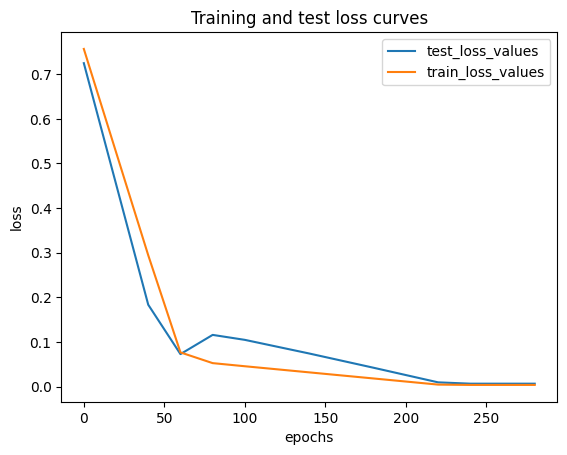

In [12]:
plt.plot(epoch_count, test_loss_values, label="test_loss_values")
plt.plot(epoch_count, train_loss_values, label="train_loss_values")
plt.title("Training and test loss curves")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [13]:
print(f"following values for weights and bias:\n{model_1.state_dict()}\n")
print(f"original values of weights {weights} and bias {bias}")

following values for weights and bias:
OrderedDict([('weights', tensor([0.3067], device='cuda:0')), ('bias', tensor([0.9011], device='cuda:0'))])

original values of weights 0.3 and bias 0.9


In [14]:
# Make predictions with the model
model_1.eval()
with torch.inference_mode():
  x_testing = x_test
  y_pred = model_1(x_testing)
print(f"these are prediction value : {y_pred}\n")
print(f"these are real value : {y_test}\n")

these are prediction value : tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]], device='cuda:0')

these are real value : tensor([[1.1400],
        [1.1430],
        [1.1460],
        [1.1490],
        [1.1520],
        [1.1550],
        [1.1580],
        [1.1610],
        [1.1640],
        [1.1670],
        [1.1700],
        [1.1730],
        [1.1760],
        [1.1790],
        [1.1820],
        [1.1850],
        [1.1880],
        [1.1910],
        [1.1940],
        [1.1970]], device='cuda:0')



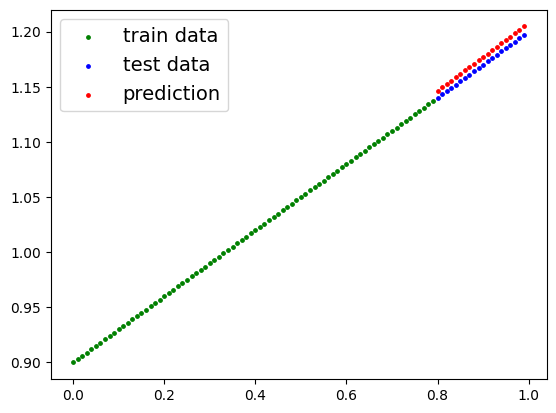

<Figure size 1400x1000 with 0 Axes>

In [15]:
# Plot the predictions (these may need to be on a specific device)
linear_plot(predictions=y_pred.cpu())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [16]:
from pathlib import Path

# 1. Create models directory
PATH = Path("models")
PATH.mkdir(parents=True, exist_ok =True)

# 2. Create model save path
NAME = "01_pytorch_exercise.pth"
MODEL_SAVE = PATH / NAME

# 3. Save the model state dict
print(f"saving model to {MODEL_SAVE}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE)

saving model to models/01_pytorch_exercise.pth


In [17]:
#check saved path model
!ls -l models/01_pytorch_exercise.pth

-rw-r--r-- 1 root root 1568 Dec 26 11:17 models/01_pytorch_exercise.pth


In [18]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
load_model1= LinearRegression()

load_model1.load_state_dict(torch.load(f=MODEL_SAVE))
load_model1

LinearRegression()

In [19]:
# Make predictions with loaded model and compare them to the previous
load_model1.eval()
with torch.inference_mode():
  x_testing = x_test.cpu()
  loaded_model = load_model1(x_testing)
  loaded_model

y_pred.cpu() == loaded_model

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# try with linear regression module


In [20]:
# Create the loss function and optimizer
params2 = model_2.parameters()
lr2 = 0.01

loss_fn2 = nn.L1Loss()
optimizer2 = torch.optim.SGD(params=params2, lr=lr2)

In [21]:
model_2.to(cuda)
next(model_2.parameters()).device

device(type='cuda', index=0)

In [22]:
torch.manual_seed(42)

# Training loop
epoch_count2 = []
train_loss_values2=[]
test_loss_values2 = []

# Train model for 300 epochs
epochs = 300

# Send data to target device
X_train2 = X_train.to(cuda)
x_test2 = x_test.to(cuda)
y_train2 = y_train.to(cuda)
y_test2 = y_test.to(cuda)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_2.train()

  # 1. Forward pass
  y_pred2 = model_2(X_train2)

  # 2. Calculate loss
  train_loss2 = loss_fn2(y_pred2, y_train2)

  # 3. Zero gradients
  optimizer2.zero_grad()


  # 4. Backpropagation
  train_loss2.backward()


  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs

  # Put model in evaluation mode and setup inference context
  model_2.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_pred2 = model_2(x_test2)
    # 2. Calculate test loss
    test_loss2 = loss_fn(test_pred2, y_test2.type(torch.float))

    if epoch % 20 == 0:
      epoch_count2.append(epoch)
      test_loss_values2.append(test_loss2.cpu().detach().numpy())
      train_loss_values2.append(train_loss2.cpu().detach().numpy())
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {train_loss2:.3f} | Test loss: {test_loss2:.3f}")

Epoch: 0 | Train loss: 0.903 | Test loss: 1.149
Epoch: 20 | Train loss: 0.672 | Test loss: 0.879
Epoch: 40 | Train loss: 0.441 | Test loss: 0.608
Epoch: 60 | Train loss: 0.210 | Test loss: 0.337
Epoch: 80 | Train loss: 0.044 | Test loss: 0.119
Epoch: 100 | Train loss: 0.033 | Test loss: 0.077
Epoch: 120 | Train loss: 0.026 | Test loss: 0.061
Epoch: 140 | Train loss: 0.019 | Test loss: 0.045
Epoch: 160 | Train loss: 0.012 | Test loss: 0.028
Epoch: 180 | Train loss: 0.006 | Test loss: 0.012
Epoch: 200 | Train loss: 0.006 | Test loss: 0.004
Epoch: 220 | Train loss: 0.006 | Test loss: 0.004
Epoch: 240 | Train loss: 0.006 | Test loss: 0.004
Epoch: 260 | Train loss: 0.006 | Test loss: 0.004
Epoch: 280 | Train loss: 0.006 | Test loss: 0.004


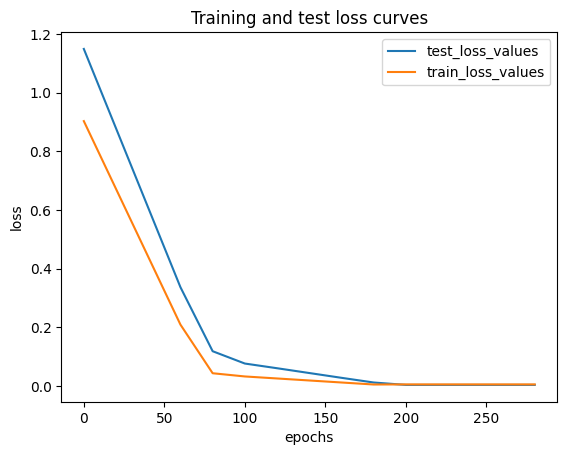

In [23]:
plt.plot(epoch_count2, test_loss_values2, label="test_loss_values")
plt.plot(epoch_count2, train_loss_values2, label="train_loss_values")
plt.title("Training and test loss curves")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [24]:
print(f"following values for weights and bias:\n{model_2.state_dict()}\n")
print(f"original values of weights {weights} and bias {bias}")

following values for weights and bias:
OrderedDict([('Linear_layer.weight', tensor([[0.2931]], device='cuda:0')), ('Linear_layer.bias', tensor([0.8968], device='cuda:0'))])

original values of weights 0.3 and bias 0.9


In [32]:
# Make predictions with the model
model_2.eval()
with torch.inference_mode():
  x_testing = x_test2
  y_pred2 = model_2(x_testing)
print(f"these are prediction value : {y_pred2}\n")
print(f"these are real value : {y_test2}\n")

these are prediction value : tensor([[1.1313],
        [1.1342],
        [1.1371],
        [1.1401],
        [1.1430],
        [1.1459],
        [1.1489],
        [1.1518],
        [1.1547],
        [1.1577],
        [1.1606],
        [1.1635],
        [1.1665],
        [1.1694],
        [1.1723],
        [1.1753],
        [1.1782],
        [1.1811],
        [1.1840],
        [1.1870]], device='cuda:0')

these are real value : tensor([[1.1400],
        [1.1430],
        [1.1460],
        [1.1490],
        [1.1520],
        [1.1550],
        [1.1580],
        [1.1610],
        [1.1640],
        [1.1670],
        [1.1700],
        [1.1730],
        [1.1760],
        [1.1790],
        [1.1820],
        [1.1850],
        [1.1880],
        [1.1910],
        [1.1940],
        [1.1970]], device='cuda:0')



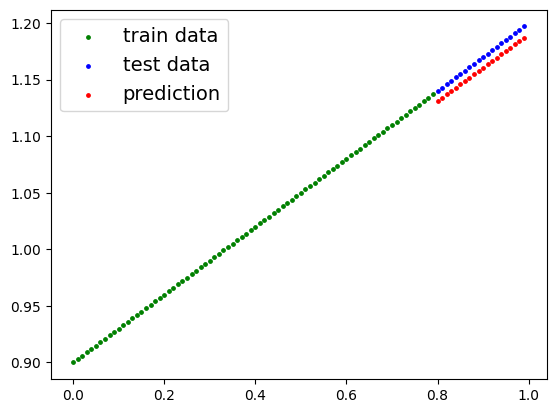

<Figure size 1400x1000 with 0 Axes>

In [33]:
# Plot the predictions (these may need to be on a specific device)
linear_plot(predictions=y_pred2.cpu())

## save trained model

In [34]:
from pathlib import Path

# 1. Create models directory
PATH = Path("models")
PATH.mkdir(parents=True, exist_ok =True)

# 2. Create model save path
NAME = "01_pytorch_exercise2.pth"
MODEL_SAVE = PATH / NAME

# 3. Save the model state dict
print(f"saving model to {MODEL_SAVE}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE)

saving model to models/01_pytorch_exercise2.pth


In [35]:
#check saved path model
!ls -l models/01_pytorch_exercise2.pth

-rw-r--r-- 1 root root 1638 Dec 26 11:21 models/01_pytorch_exercise2.pth


In [36]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
load_model2= LinearRegressionVer2()

load_model2.load_state_dict(torch.load(f=MODEL_SAVE))
load_model2

LinearRegressionVer2(
  (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [37]:
# Make predictions with loaded model and compare them to the previous
load_model2.eval()
with torch.inference_mode():
  x_testing2 = x_test2.cpu()
  loaded_model2 = load_model2(x_testing2)
  loaded_model2

y_pred2.cpu() == loaded_model2

tensor([[ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False]])

In [38]:
print(f"y_pred2 cpu \n {y_pred2.cpu()}")
print(f"loaded_model2 \n {loaded_model2}")

y_pred2 cpu 
 tensor([[1.1313],
        [1.1342],
        [1.1371],
        [1.1401],
        [1.1430],
        [1.1459],
        [1.1489],
        [1.1518],
        [1.1547],
        [1.1577],
        [1.1606],
        [1.1635],
        [1.1665],
        [1.1694],
        [1.1723],
        [1.1753],
        [1.1782],
        [1.1811],
        [1.1840],
        [1.1870]])
loaded_model2 
 tensor([[1.1313],
        [1.1342],
        [1.1371],
        [1.1401],
        [1.1430],
        [1.1459],
        [1.1489],
        [1.1518],
        [1.1547],
        [1.1577],
        [1.1606],
        [1.1635],
        [1.1665],
        [1.1694],
        [1.1723],
        [1.1753],
        [1.1782],
        [1.1811],
        [1.1840],
        [1.1870]])
